# Define the Ross Sea MPA from the documentation available on the CCAMLR website

Shapefile provided on CCAMLR GIS is not easy to use (problemen when crossing the 0 longitude line). So we regenerate polygons for each of the GPZ of this MPA based on the defined borders: Conservation Measure (CM) 91-05 (2016) : https://www.ccamlr.org/en/measure-91-05-2016 

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/data_envir/MPA')

In [31]:
# Coordinates GPZ i
# Make 2 polygons for the eastern and western sides of the MPA 
coordinates = [
    (-180, -76),
    (-170, -76),
    (-170, -76.3),
    (-164, -76.3),
    (-164, -75),
    (-170, -75),
    (-170, -72),
    (-150, -72),
    (-150, -75.9),
    (-180, -78.2)
]


polygon = Polygon(coordinates)
df11 = gpd.GeoDataFrame(index=[1], geometry=[polygon], crs="EPSG:4326")
df11['Name'] = 'Ross_sea_GPZi_w'
df11

,geometry,Name
1,"POLYGON ((-180.00000 -76.00000, -170.00000 -76...",Ross_sea_GPZi_w


<Axes: >

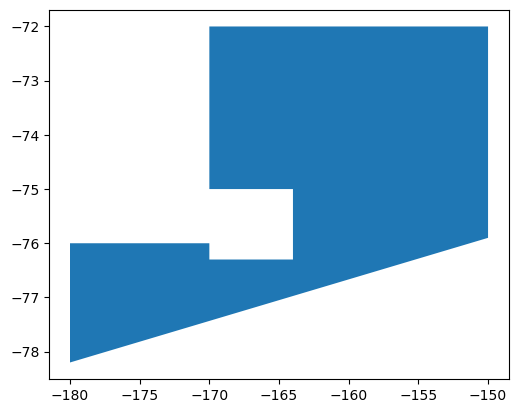

In [32]:
df11.geometry.plot()

In [33]:
# Coordinates GPZ i
# Make 2 polygons for the eastern and western sides of the MPA 
coordinates = [
    (160, -69.1),
    (160, -65),
    (173.45, -65),
    (173.45, -73.3),
    (180 , -73.3),
    (180, -78.2), # coastline point when considering the eastern side of the AMP
    (170, -77.45), # add points to follow the coast approximatly
    (165.55, -75.55), # same
    (171.75, -72.5) # same
]


polygon = Polygon(coordinates)
df12 = gpd.GeoDataFrame(index=[2], geometry=[polygon], crs="EPSG:4326")
df12['Name'] = 'Ross_sea_GPZi_e'
df12

,geometry,Name
2,"POLYGON ((160.00000 -69.10000, 160.00000 -65.0...",Ross_sea_GPZi_e


<Axes: >

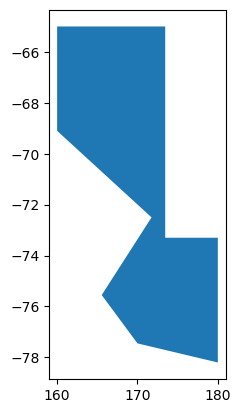

In [34]:
df12.geometry.plot()

In [35]:
# Coordinates GPZ ii
coordinates = [
    (163, -62.3),
    (163, -60),
    (168, -60),
    (168, -62.3)
]


polygon = Polygon(coordinates)
df2 = gpd.GeoDataFrame(index=[3], geometry=[polygon], crs="EPSG:4326")
df2['Name'] = 'Ross_sea_GPZii'
df2

,geometry,Name
3,"POLYGON ((163.00000 -62.30000, 163.00000 -60.0...",Ross_sea_GPZii


<Axes: >

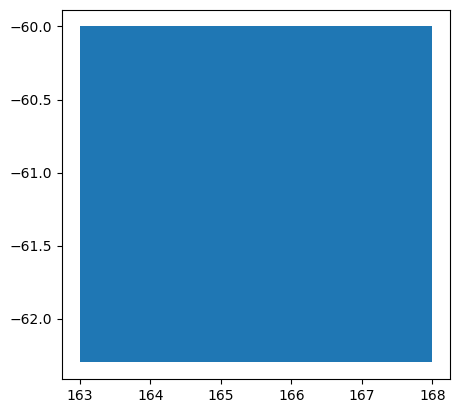

In [36]:
df2.geometry.plot()

In [45]:
# Coordinates GPZ iii
# Make 2 polygons for the eastern and western sides of the MPA 
coordinates = [
    (178.99, -69), # avoid border effect on longitude when clipping
    (178.99, -66.45), # avoid border effect on longitude when clipping
    (180, -66.45),
    (180, -69)
]


polygon = Polygon(coordinates)
df31 = gpd.GeoDataFrame(index=[4], geometry=[polygon], crs="EPSG:4326")
df31['Name'] = 'Ross_sea_GPZiii_e'
df31

,geometry,Name
4,"POLYGON ((178.99000 -69.00000, 178.99000 -66.4...",Ross_sea_GPZiii_e


In [46]:
# Coordinates GPZ iii
# Make 2 polygons for the eastern and western sides of the MPA 
coordinates = [
    (-179, -69),
    (-179, -66.45),
    (-180, -66.45),
    (-180, -69)
]


polygon = Polygon(coordinates)
df32 = gpd.GeoDataFrame(index=[5], geometry=[polygon], crs="EPSG:4326")
df32['Name'] = 'Ross_sea_GPZiii_w'
df32

,geometry,Name
5,"POLYGON ((-179.00000 -69.00000, -179.00000 -66...",Ross_sea_GPZiii_w


In [47]:
df = pd.concat([df11, df12, df2, df31, df32])
df["row_id"] = df.index-1
df.reset_index(drop=True, inplace=True)
df.set_index("row_id", inplace = True)

df

,geometry,Name
row_id,,
0,"POLYGON ((-180.00000 -76.00000, -170.00000 -76...",Ross_sea_GPZi_w
1,"POLYGON ((160.00000 -69.10000, 160.00000 -65.0...",Ross_sea_GPZi_e
2,"POLYGON ((163.00000 -62.30000, 163.00000 -60.0...",Ross_sea_GPZii
3,"POLYGON ((178.99000 -69.00000, 178.99000 -66.4...",Ross_sea_GPZiii_e
4,"POLYGON ((-179.00000 -69.00000, -179.00000 -66...",Ross_sea_GPZiii_w


In [48]:
#save inshape file
df.to_file('Ross_sea_MPA_GPZ.shp') 